# Laboratorio 6 - Aprendizaje Estadistico

por: Nicolás Osorno Roa

In [ ]:
# 1. vision general de los datos

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
# 2. Construccion DataFrame

df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['Target'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# 3. Cambio nombre de las columnas

columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]

df.columns = cols

df

,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# 4. Informacion gneral Dataframe y estadistica descriptiva

print(" Información general:")
df.info()

print("\n Dimensiones del dataset:")
print("Filas:", df.shape[0], " Columnas:", df.shape[1])

print("\n Valores nulos por columna:")
print(df.isnull().sum())

print("\n Estadísticas descriptivas:")
print(df.describe())

print("\n Valores unicos por columna:")
print(df.nunique())


 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SepalLength_cm  150 non-null    float64
 1   SepalWidth_cm   150 non-null    float64
 2   PetalLength_cm  150 non-null    float64
 3   PetalWidth_cm   150 non-null    float64
 4   Target          150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB

 Dimensiones del dataset:
Filas: 150  Columnas: 5

 Valores nulos por columna:
SepalLength_cm    0
SepalWidth_cm     0
PetalLength_cm    0
PetalWidth_cm     0
Target            0
dtype: int64

 Estadísticas descriptivas:
       SepalLength_cm  SepalWidth_cm  PetalLength_cm  PetalWidth_cm  \
count      150.000000     150.000000      150.000000     150.000000   
mean         5.843333       3.057333        3.758000       1.199333   
std          0.828066       0.435866        1.765298       0.762238   
min

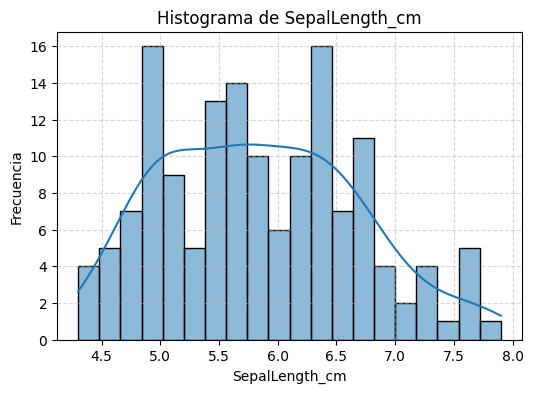

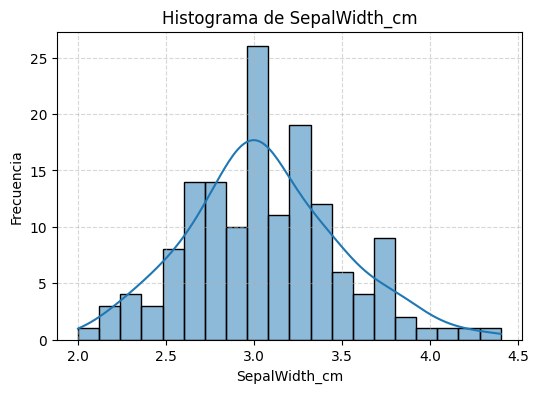

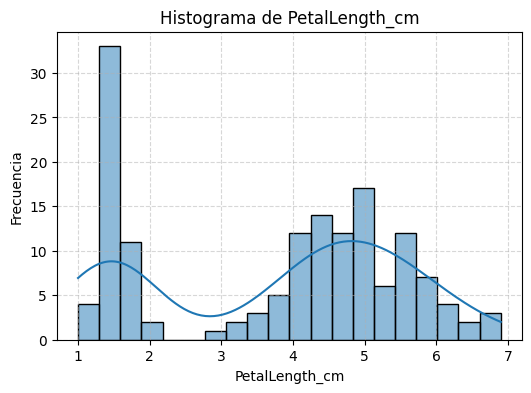

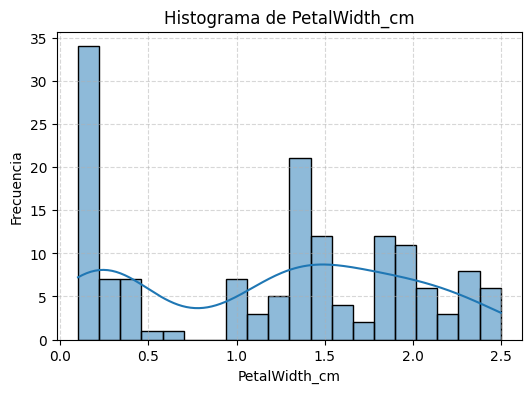

In [ ]:
# 5. Grafica de los datos (Histogramas)

for col in df.drop('Target',axis=1).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


  # podemos ver de los histogramas dos grupos claros para la longitud y ancho de los petalos, por que pueden ser las caracteristicas mas diferenciadores

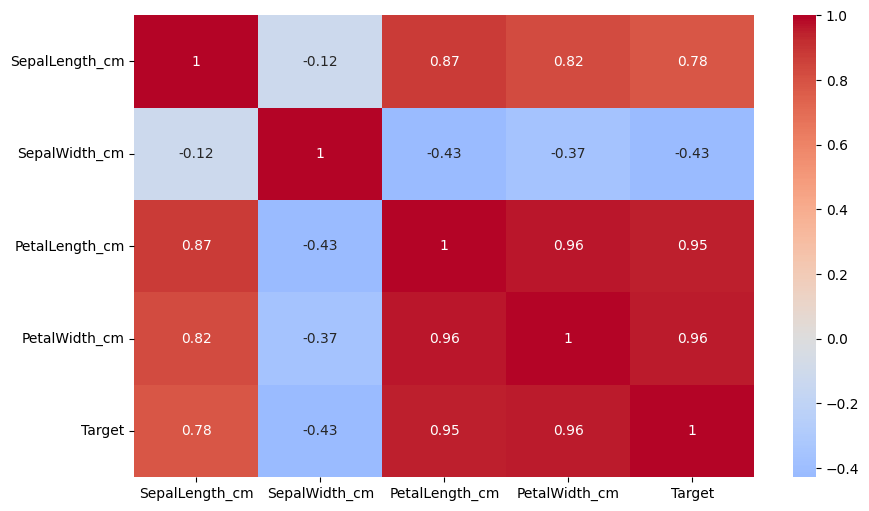

In [ ]:
# 6. Matris de correlación


corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

In [ ]:
# 7. Separacion en datos de test y entrenamiento

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  train_set = df.iloc[train_index]
  test_set = df.iloc[test_index]

#  Target divide el data set en 3 categorias (0,1,2), la divicion se esta haciendo de forma que la proporcion de cada categoria del target
#  se mantenga luego de la division, es decir si en el data set original el 20% de los datos son categoria 1, entonces el trein_set y el test_set
#  tienen el 20%  de esa categoria, asi se asegura que las muestras tomadas sean representativas del los datos originales.

In [ ]:
# setosa es para target --> 0
# no setosa es para target --> 1, 2

train_set.loc[:,'TargetSetosa'] = train_set['Target'].apply(lambda x: 0 if x == 0 else 1)
test_set.loc[:,'TargetSetosa'] = test_set['Target'].apply(lambda x: 0 if x == 0 else 1)


train_set

/tmp/ipython-input-3234263967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.loc[:,'TargetSetosa'] = train_set['Target'].apply(lambda x: 0 if x == 0 else 1)
/tmp/ipython-input-3234263967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.loc[:,'TargetSetosa'] = test_set['Target'].apply(lambda x: 0 if x == 0 else 1)


,SepalLength_cm,SepalWidth_cm,PetalLength_cm,PetalWidth_cm,Target,TargetSetosa
8,4.4,2.9,1.4,0.2,0,0
106,4.9,2.5,4.5,1.7,2,1
76,6.8,2.8,4.8,1.4,1,1
9,4.9,3.1,1.5,0.1,0,0
89,5.5,2.5,4.0,1.3,1,1
...,...,...,...,...,...,...
37,4.9,3.6,1.4,0.1,0,0
2,4.7,3.2,1.3,0.2,0,0
33,5.5,4.2,1.4,0.2,0,0
52,6.9,3.1,4.9,1.5,1,1


In [ ]:
# 8. Modelo de regresion logistico para clasificacion setosa y no setosa

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression()

x_train = train_set.drop(['Target', 'TargetSetosa'], axis = 1)
y_train = train_set['TargetSetosa']

model.fit(x_train, y_train)

y_pred = model.predict(test_set.drop(['Target','TargetSetosa'], axis = 1))

print("El coeficioente de derminacion es :", accuracy_score(test_set['TargetSetosa'], y_pred),"el modelo clasifica bien todos los datos de test")



El coeficioente de derminacion es : 1.0 el modelo clasifica bien todos los datos de test


In [ ]:
# 9. Deteminar una frentera de clasificacion para una de las caracteristicas Longitud del pétalo

X = train_set[['PetalLength_cm']]
y = train_set['TargetSetosa']

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new  = np.linspace(0, 8, 1000).reshape(-1, 1)

prob = log_reg.predict_proba(X_new)

decision_boundary = X_new[prob[:, 0] >= 0.5][-1]

decision_boundary


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2.73873874])

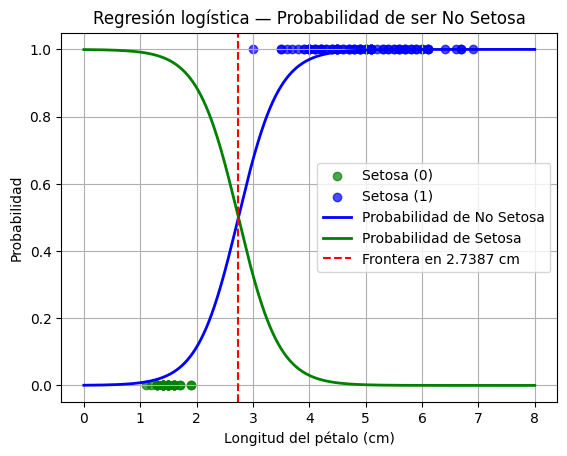

In [ ]:

# 10. Graficacion regrecion logistica para la caracteristica Longitud del pétalo

plt.scatter(X[y==0], y[y==0], color='green', label='Setosa (0)',alpha=0.7)
plt.scatter(X[y==1], y[y==1], color='blue', label='Setosa (1)',alpha=0.7)

plt.plot(X_new, prob[:,1], color='blue', linewidth=2, label='Probabilidad de No Setosa')
plt.plot(X_new, prob[:,0], color='green', linewidth=2, label='Probabilidad de Setosa')

plt.axvline(decision_boundary , color='red', linestyle='--', label=f'Frontera en {round(decision_boundary[0],4)} cm')

plt.xlabel("Longitud del pétalo (cm)")
plt.ylabel("Probabilidad")
plt.title("Regresión logística — Probabilidad de ser No Setosa")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 11. Regresion logistica para las tres clases de flores (multiclasificador)

model3 = LogisticRegression()

x_train3 = train_set.drop(['Target', 'TargetSetosa'], axis = 1)
y_train3 = train_set['Target']

model3.fit(x_train3,y_train3)



LogisticRegression()

In [ ]:
# 12. probabilidad de clase de la flor dada

X_new = pd.DataFrame([[4.9, 5.0, 1.8, 0.3]],
                     columns=x_train3.columns)
prob_val = model3.predict_proba(X_new)

print("La probabilidad de que los valores dados correspondan a setosa es: ", prob_val[0][0]*100)
print("La probabilidad de que los valores dados correspondan a versicolor es: ", prob_val[0][1]*100)
print("La probabilidad de que los valores dados correspondan a virginica es: ", prob_val[0][2]*100)

La probabilidad de que los valores dados correspondan a setosa es:  99.21485263972922
La probabilidad de que los valores dados correspondan a versicolor es:  0.7851411877247807
La probabilidad de que los valores dados correspondan a virginica es:  6.17254601840745e-06
